In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
from google.colab import files
uploaded = files.upload()


Saving bank.csv to bank.csv


In [14]:
from google.colab import files
uploaded = files.upload()


Saving medical_students_dataset.csv to medical_students_dataset.csv


In [15]:
from google.colab import files
uploaded = files.upload()


Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [16]:
import pandas as pd

bank_df = pd.read_csv("bank.csv")

bank_df.info()

object_cols = bank_df.select_dtypes(include="object").columns
print("Object columns:")
print(object_cols)


print("\nUnique values in object columns:")
for col in object_cols:
    print(f"\nColumn: {col}")
    print(bank_df[col].unique())


print("\nNull values in each column:")
print(bank_df.isnull().sum())


bank_numeric = bank_df.drop(columns=object_cols)
bank_numeric.to_csv("banknumericdata.csv", index=False)


bank_numeric_loaded = pd.read_csv("banknumericdata.csv")
print("\nSummary statistics of numeric data:")
print(bank_numeric_loaded.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
Object columns:
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
    

In [19]:
import pandas as pd
import numpy as np

med_df = pd.read_csv("medical_students_dataset.csv")


print("Null values before filling:")
print(med_df.isnull().sum())


for col in med_df.columns:
    if med_df[col].dtype != "object":
        med_df[col] = med_df[col].fillna(med_df[col].mean())
    else:
        med_df[col] = med_df[col].fillna(med_df[col].mode()[0])

print("\nNull values after filling:")
print(med_df.isnull().sum())


print("\nNumber of duplicate rows before dropping:")
print(med_df.duplicated().sum())

med_df = med_df.drop_duplicates()

print("\nNumber of duplicate rows after dropping:")
print(med_df.duplicated().sum())


Null values before filling:
Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BMI               20000
Temperature       20000
Heart Rate        20000
Blood Pressure    20000
Cholesterol       20000
Diabetes          20000
Smoking           20000
dtype: int64

Null values after filling:
Student ID        0
Age               0
Gender            0
Height            0
Weight            0
Blood Type        0
BMI               0
Temperature       0
Heart Rate        0
Blood Pressure    0
Cholesterol       0
Diabetes          0
Smoking           0
dtype: int64

Number of duplicate rows before dropping:
12572

Number of duplicate rows after dropping:
0


In [22]:
import pandas as pd

titanic = pd.read_csv("Titanic-Dataset.csv")

subset = titanic[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
subset_pclass1 = subset[subset['Pclass'] == 1]

fare_mean = subset_pclass1['Fare'].mean()
fare_median = subset_pclass1['Fare'].median()
fare_max = subset_pclass1['Fare'].max()
fare_min = subset_pclass1['Fare'].min()

print("Fare statistics for first-class passengers:")
print("Mean:", fare_mean)
print("Median:", fare_median)
print("Max:", fare_max)
print("Min:", fare_min)


Fare statistics for first-class passengers:
Mean: 84.1546875
Median: 60.287499999999994
Max: 512.3292
Min: 0.0


In [24]:
import pandas as pd

titanic = pd.read_csv("Titanic-Dataset.csv")

subset = titanic[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
subset_pclass1 = subset[subset['Pclass'] == 1]

null_age_count = subset_pclass1['Age'].isnull().sum()
print("Number of null values in Age (Pclass=1 subset):", null_age_count)

subset_pclass1 = subset_pclass1.dropna(subset=['Age'])
print("\nInfo after dropping rows with null Age:")
print(subset_pclass1.info())


Number of null values in Age (Pclass=1 subset): 30

Info after dropping rows with null Age:
<class 'pandas.core.frame.DataFrame'>
Index: 186 entries, 1 to 889
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      186 non-null    object 
 1   Pclass    186 non-null    int64  
 2   Sex       186 non-null    object 
 3   Age       186 non-null    float64
 4   Fare      186 non-null    float64
 5   Survived  186 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 10.2+ KB
None


In [25]:
import pandas as pd

titanic = pd.read_csv("Titanic-Dataset.csv")

embark_dummies = pd.get_dummies(titanic['Embarked'], prefix='Embarked')

titanic_encoded = pd.concat([titanic, embark_dummies], axis=1)

titanic_encoded = titanic_encoded.drop(columns=['Embarked'])

print(titanic_encoded.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   7.9250   NaN       False       False        True  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

titanic = pd.read_csv("")

gender_survival = titanic.groupby('Sex')['Survived'].mean()
print("Mean survival rate by gender:")
print(gender_survival)

sns.barplot(x='Sex', y='Survived', data=titanic)
plt.title("Survival Rate by Gender")
plt.show()


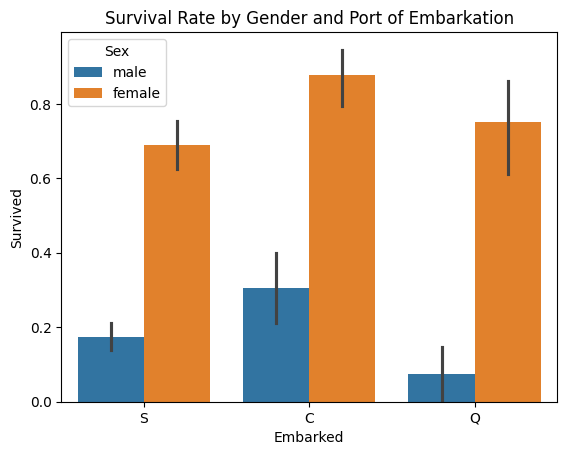

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

titanic = pd.read_csv("Titanic-Dataset.csv")

sns.barplot(x='Embarked', y='Survived', hue='Sex', data=titanic)
plt.title("Survival Rate by Gender and Port of Embarkation")
plt.show()


/tmp/ipython-input-3598447299.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_class_age = titanic.groupby(['Pclass', 'AgeGroup'])['Survived'].mean()


Survival rate by Pclass and AgeGroup:
Pclass  AgeGroup     
1       (0.419, 19.0]    0.809524
        (19.0, 25.0]     0.761905
        (25.0, 31.8]     0.666667
        (31.8, 41.0]     0.777778
        (41.0, 80.0]     0.506667
2       (0.419, 19.0]    0.742857
        (19.0, 25.0]     0.400000
        (25.0, 31.8]     0.416667
        (31.8, 41.0]     0.461538
        (41.0, 80.0]     0.363636
3       (0.419, 19.0]    0.333333
        (19.0, 25.0]     0.197674
        (25.0, 31.8]     0.283582
        (31.8, 41.0]     0.166667
        (41.0, 80.0]     0.088235
Name: Survived, dtype: float64


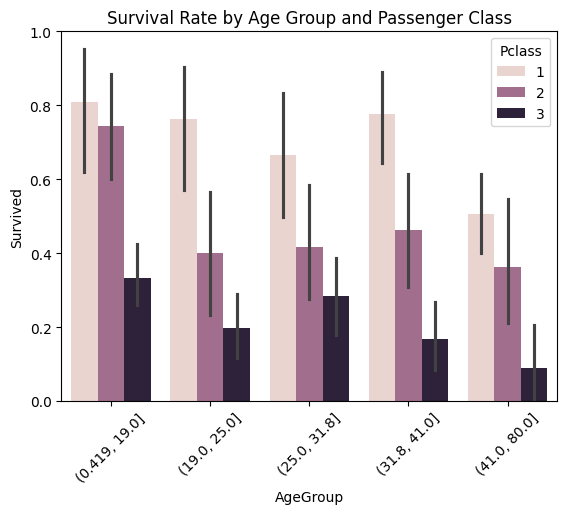

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

titanic = pd.read_csv("Titanic-Dataset.csv")

titanic['AgeGroup'] = pd.qcut(titanic['Age'], q=5)

survival_by_class_age = titanic.groupby(['Pclass', 'AgeGroup'])['Survived'].mean()
print("Survival rate by Pclass and AgeGroup:")
print(survival_by_class_age)

sns.barplot(x='AgeGroup', y='Survived', hue='Pclass', data=titanic)
plt.xticks(rotation=45)
plt.title("Survival Rate by Age Group and Passenger Class")
plt.show()
